### SVM Kernel Implementation

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
x = np.linspace(-5,5,100)
y = np.sqrt(10**2 - x**2)

y = np.hstack([y,-y])
x = np.hstack([x,-x])


In [38]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)

y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

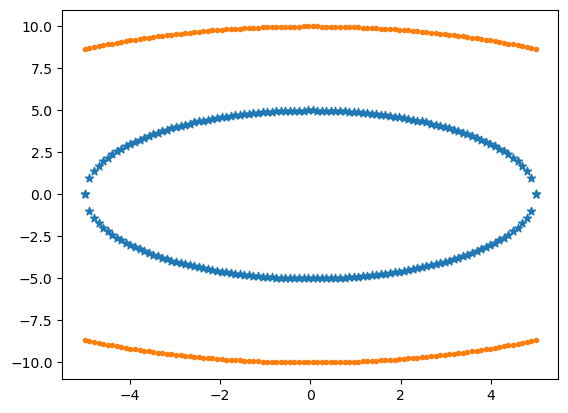

In [39]:
plt.scatter(x1,y1,marker="*")
plt.scatter(x,y,marker=".")

In [ ]:
df1 = pd.DataFrame(
    np.vstack([y,x]).T,   # .T transposes the array
    columns=['X1','X2']
)
df1['Y'] = 0

df2 = pd.DataFrame(
    np.vstack([y1,x1]).T,
    columns=['X1','X2']
)
df2['Y'] = 1

df = pd.concat([df1, df2], ignore_index=True)

df.iloc[198:205,:]

,X1,X2,Y
198,-8.717792,-4.89899,0
199,-8.660254,-5.00000,0
200,0.000000,-5.00000,1
201,0.999949,-4.89899,1
202,1.406908,-4.79798,1
203,1.714198,-4.69697,1
204,1.969049,-4.59596,1


In [41]:
# independent, dependent features

X = df.iloc[:,:2]
y = df.iloc[:,2]
print(X.head())
print(y.head())

         X1       X2
0  8.660254 -5.00000
1  8.717792 -4.89899
2  8.773790 -4.79798
3  8.828277 -4.69697
4  8.881281 -4.59596
0    0
1    0
2    0
3    0
4    0
Name: Y, dtype: int64


In [42]:
from sklearn.model_selection import train_test_split 

X_trainn,X_testn,y_trainn,y_testn = train_test_split(X,y,test_size=0.3,random_state=45)

In [53]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

model = SVC(kernel='poly')
model.fit(X_trainn,y_trainn)

y_predn = model.predict(X_testn)
print(classification_report(y_testn,y_predn))
print(confusion_matrix(y_testn,y_predn))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        54
           1       0.00      0.00      0.00        66

    accuracy                           0.45       120
   macro avg       0.23      0.50      0.31       120
weighted avg       0.20      0.45      0.28       120

[[54  0]
 [66  0]]


c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [52]:
model = SVC(kernel='rbf')
model.fit(X_trainn,y_trainn)

y_predn = model.predict(X_testn)
print(classification_report(y_testn,y_predn))
print(confusion_matrix(y_testn,y_predn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        66

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[54  0]
 [ 0 66]]


### Polynomial Kernel

K(x,y) = (x*y + c)^d  

where x is the n features and y is the n features, we add another n feature of "y"

In [44]:
# lets add feature "y"
df["X1_sq"] = df["X1"]**2 
df["X2_sq"] = df["X2"]**2
df["X1*X2"] = (df["X1"]*df["X2"])

In [45]:
df.head()

,X1,X2,Y,X1_sq,X2_sq,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [46]:
X = df[['X1','X2','X1_sq','X2_sq','X1*X2']] 
y = df[['Y']]
y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=34)

In [48]:
# plotting the 3d curve, this one is not clearly seperable 

import plotly.express as px 

fig = px.scatter_3d(df,x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

In [49]:
# now we can use the plane to seperate

fig = px.scatter_3d(df,x='X1_sq',y='X2_sq',z="X1*X2",color='Y')
fig.show()

In [50]:
from sklearn.svm import SVC

model = SVC(kernel="linear")

model.fit(X_train,y_train)

c:\Users\Nitin Flavier\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(kernel='linear')

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        57

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[63  0]
 [ 0 57]]
